In [6]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.lib import utils
from src.lib import cell_blobs_skimage as blobsutils

In [7]:
dfs = {path.split("/")[-1].split(".")[0]: pd.read_csv(path, index_col=0) 
        for path in glob.glob("../data/interim/dataframes/blobs_data/*.csv")}

In [19]:
lower_tresh = 900
upper_tresh = 70000
for name, df in dfs.items():
    df_lower = df[df['area'] < lower_tresh] 
    df_upper = df[df['area'] > upper_tresh]
    if len(df_lower) > 0 and len(df_upper) > 0:
        print(name)

CDH1_B1_NS
CDH1_B2_NS
CTNNA1_A3_NO
CTNND1_B1_NO
CDH1_B3_NO
VIM_H2_NO
NegsiRNA_L3_NS
CTNNA1_A1_NS
ACTR3_C1_NO
NegsiRNA_L3_CA
VASP_I2_NO
VIM_H2_NS
VASP_I2_NS
ABL1_A1_NS
CTNNA1_A1_NO
ACTN1_B2_NO
P2RX4_E2_CA
VIM_H1_NS
ACTN1_B1_NO
GNB2L1_E3_CA
CTNNB1_A1_NO
NegsiRNA_L2_CA
VCL_G2_NS
CTNNA1_A3_NS
CAMSAP3-2310057J16RIK_E1_NO
CD151_A3_NO
CDH1_B1_NO
ACTN1_B1_NS
GNB2L1_E1_NO
AKAP5_B2_NS
CDH2_B1_CA
JUP_D3_NO
CTNNA1_A2_NO


(-0.5, 1535.5, 1535.5, -0.5)

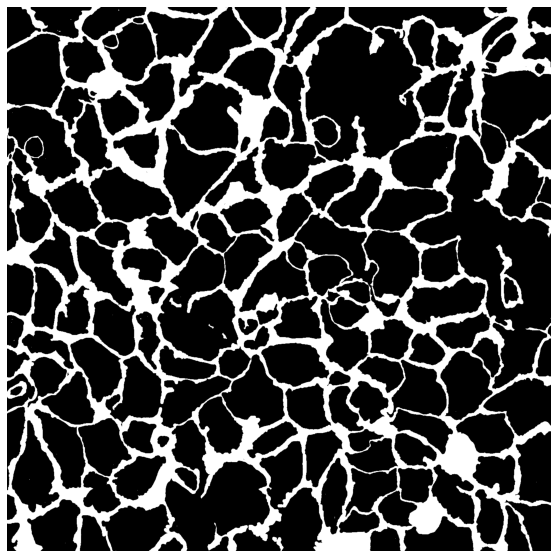

In [26]:
img_name = 'VASP_I2_NO'
nuclei_img, ccj_img, seg_img, _ = utils.load_images('../data/raw/images', img_name)
plt.figure(figsize=(10, 10))
plt.imshow(seg_img, cmap='gray')
plt.axis('off')

In [22]:
df_blobs, labeled_img = blobsutils.get_blobs_measurements(seg_img, return_img=True)

(-0.5, 1535.5, 1535.5, -0.5)

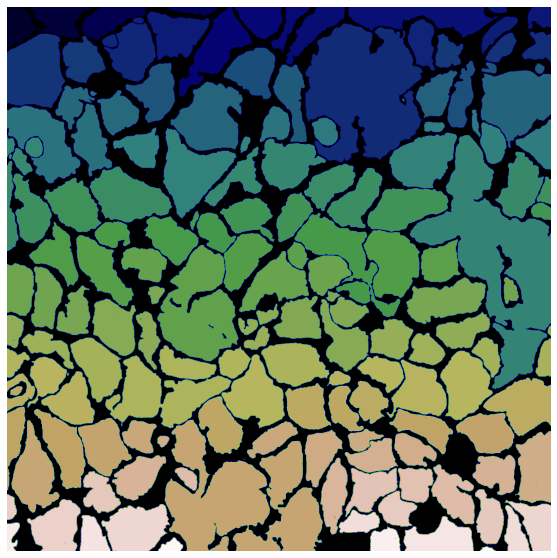

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(labeled_img, cmap='gist_earth')
plt.axis('off')

(-0.5, 1535.5, 1535.5, -0.5)

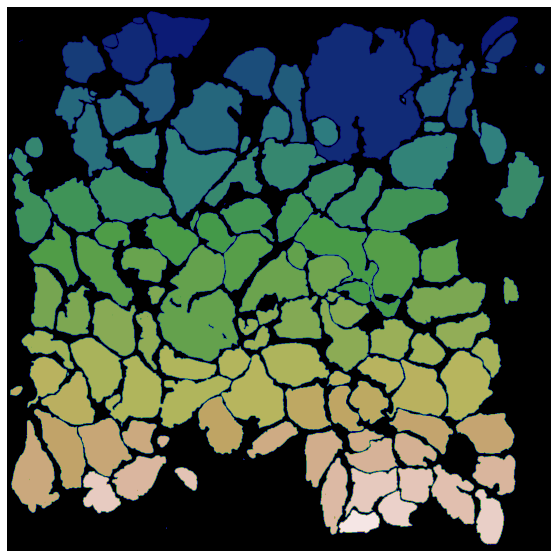

In [40]:
labeled_img_borderless = labeled_img.copy()
border_labels = df_blobs.loc[df_blobs['is_at_border'], 'label'].values
labeled_img_borderless[np.isin(labeled_img_borderless, border_labels)] = 0
plt.figure(figsize=(10, 10))
plt.imshow(labeled_img_borderless, cmap='gist_earth')
plt.axis('off')

(-0.5, 1535.5, 1535.5, -0.5)

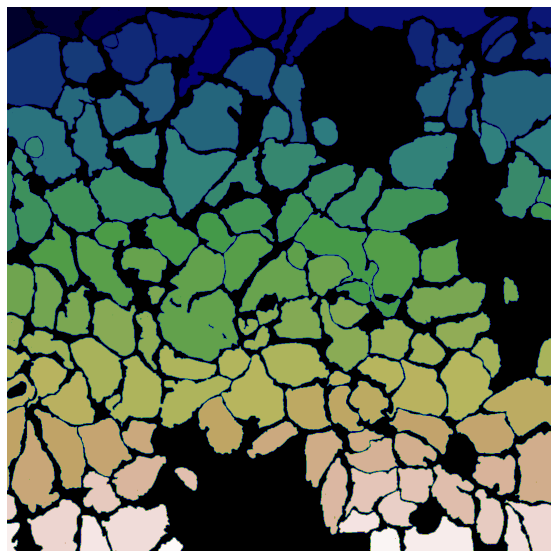

In [43]:
labeled_img_middle_values = labeled_img.copy()
middle_labels = df_blobs.loc[(df_blobs['area'] >= lower_tresh) & (df_blobs['area'] <= upper_tresh), 'label'].values
labeled_img_middle_values[~np.isin(labeled_img_middle_values, middle_labels)] = 0
plt.figure(figsize=(10, 10))
plt.imshow(labeled_img_middle_values, cmap='gist_earth')
plt.axis('off')

(-0.5, 1535.5, 1535.5, -0.5)

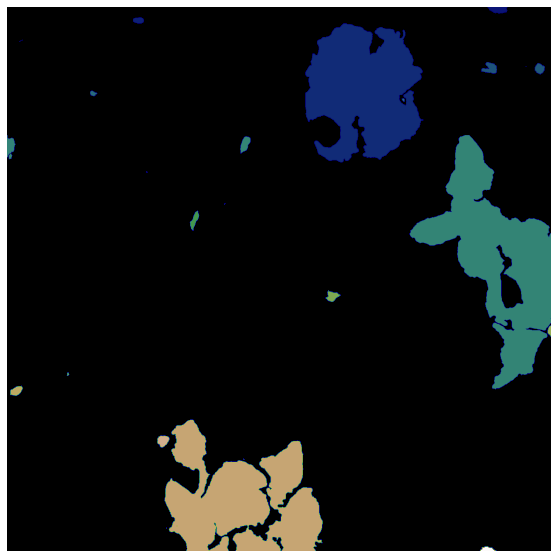

In [44]:
labeled_img_extreme_values = labeled_img.copy()
labeled_img_extreme_values[np.isin(labeled_img_extreme_values, middle_labels)] = 0
plt.figure(figsize=(10, 10))
plt.imshow(labeled_img_extreme_values, cmap='gist_earth')
plt.axis('off')

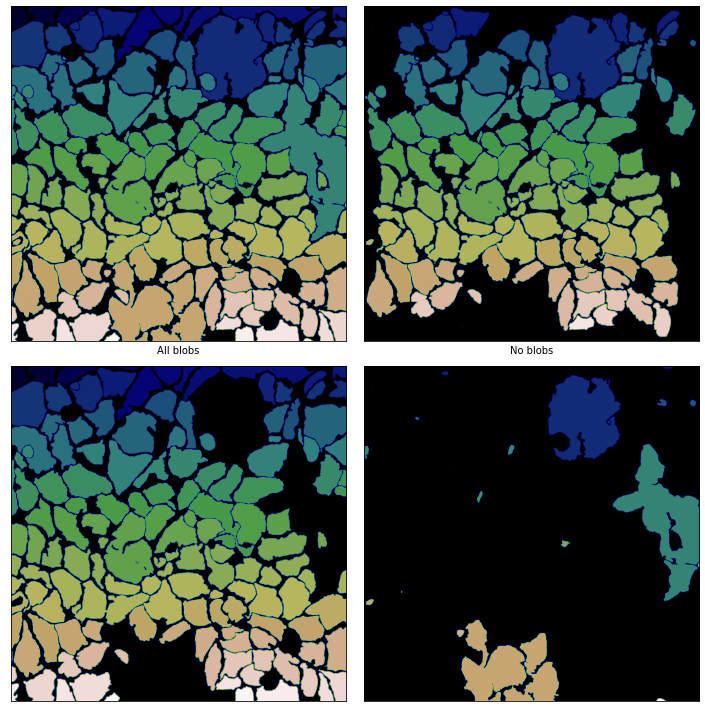

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(labeled_img, cmap='gist_earth')
axes[0, 1].imshow(labeled_img_borderless, cmap='gist_earth')
axes[1, 0].imshow(labeled_img_middle_values, cmap='gist_earth')
axes[1, 1].imshow(labeled_img_extreme_values, cmap='gist_earth')

axes[0, 0].set_xlabel('All blobs')
axes[0, 1].set_xlabel('No blobs')
axes[0, 0].set_xlabel('All blobs')
axes[0, 0].set_xlabel('All blobs')

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()